# DOMAIN: Smartphone, Electronics


### India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the right place, there are 90% chances that user will enquire for the same. This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.

## DATA DESCRIPTION:
* author : name of the person who gave the rating
* country : country the person who gave the rating belongs to
* data : date of the rating
* domain: website from which the rating was taken from
* extract: rating content
* language: language in which the rating was given
* product: name of the product/mobile phone for which the rating was given
* score: average rating for the phone
* score_max: highest rating given for the phone
* source: source from where the rating was taken

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_mobile_rating_1 = pd.read_csv('Dataset/phone_user_review_file_1.csv',encoding='latin-1')
df_mobile_rating_1.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [3]:
df_mobile_rating_1.shape

(374910, 11)

In [4]:
df_mobile_rating_2 = pd.read_csv('Dataset/phone_user_review_file_2.csv',encoding='latin-1')
df_mobile_rating_2.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [5]:
df_mobile_rating_2.shape

(114925, 11)

In [6]:
df_mobile_rating_3 = pd.read_csv('Dataset/phone_user_review_file_3.csv',encoding='latin-1')
df_mobile_rating_3.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [7]:
df_mobile_rating_3.shape

(312961, 11)

In [8]:
df_mobile_rating_4 = pd.read_csv('Dataset/phone_user_review_file_4.csv',encoding='latin-1')
df_mobile_rating_4.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [9]:
df_mobile_rating_4.shape

(98284, 11)

In [10]:
df_mobile_rating_5 = pd.read_csv('Dataset/phone_user_review_file_5.csv',encoding='latin-1')
df_mobile_rating_5.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [11]:
df_mobile_rating_5.shape

(350216, 11)

In [12]:
df_mobile_rating_6 = pd.read_csv('Dataset/phone_user_review_file_6.csv',encoding='latin-1')
df_mobile_rating_6.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [13]:
df_mobile_rating_6.shape

(163837, 11)

#### Merge the provided CSVs into one data-frame.
#### Check a few observations and shape of the data-frame.

In [14]:
mobile_rating = [df_mobile_rating_1,df_mobile_rating_2,df_mobile_rating_3,df_mobile_rating_4,df_mobile_rating_5,df_mobile_rating_6]
df_mobile_rating = pd.concat(mobile_rating)
df_mobile_rating.shape

(1415133, 11)

In [15]:
df_mobile_rating.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [16]:
df_mobile_rating.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1351644.0,8.00706,2.616121,0.2,7.2,9.2,10.0,10.0
score_max,1351644.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [17]:
df_mobile_rating.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

### Round off scores to the nearest integers.

In [18]:
df_mobile_rate = df_mobile_rating.copy()
df_mobile_rate.shape

(1415133, 11)

In [19]:
df_mobile_rate['score'] = round(df_mobile_rate['score'])

In [20]:
df_mobile_rate.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


### Check for missing values. Impute the missing values if there is any.

In [21]:
df_mobile_rate.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score        63489
score_max    63489
extract      19361
author       63202
product          1
dtype: int64

In [22]:
df_mobile_rate['score_max'].value_counts()

10.0    1351644
Name: score_max, dtype: int64

In [23]:
df_mobile_rate.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [24]:
df_mobile_rate['score_max'] = df_mobile_rate['score_max'].fillna(df_mobile_rate['score_max'].mean())

In [25]:
df_mobile_rate['score_max'].value_counts()

10.0    1415133
Name: score_max, dtype: int64

In [26]:
df_mobile_rate['score'] = df_mobile_rate['score'].fillna(df_mobile_rate['score'].median())

In [27]:
df_mobile_rate.dropna(subset=['product'],inplace=True)

In [28]:
df_mobile_rate.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      19361
author       63201
product          0
dtype: int64

### Check for duplicate values and remove them if there is any.

In [29]:
duplicate = df_mobile_rate[df_mobile_rate.duplicated(subset=['phone_url','date','lang','country','extract','author','product'])]
duplicate

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
342,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
343,/cellphones/samsung-galaxy-s8/,4/26/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Ik vind het tot nu toe een heel erg aangenaam ...,Stefanie Hinneman,Samsung Galaxy S8 Zwart
371,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Tot nu toe in de eerste dagen weinig tot geen ...,Robin Winckens,Samsung Galaxy S8 Zwart
452,/cellphones/samsung-galaxy-s8/,4/25/2017,nl,nl,Coolblue,coolblue.nl,10.0,10.0,Wat een huge scherm!,B Yapar,Samsung Galaxy S8 Zwart
3718,/cellphones/samsung-galaxy-s6-edgeplus/,10/4/2015,en,us,Amazon,amazon.com,10.0,10.0,"For readers, my opinions on this device (ATT 3...",FrozenCloud,"Samsung Galaxy S6 Edge+, Black 64GB (Verizon W..."
...,...,...,...,...,...,...,...,...,...,...,...
158568,/cellphones/samsung-sgh-2400/,7/21/2000,en,gb,Ciao,ciao.co.uk,6.0,10.0,The more expensive of the Samsung series but l...,cellnetsms,Samsung SGH 2400
158911,/cellphones/samsung-sgh-600/,4/30/2015,tr,tr,Cepworld,cepworld.com,9.0,10.0,varsa satan 05312614607,muhsin,Samsung (936) SGH-600
159375,/cellphones/alcatel-ot-easy/,11/13/2009,es,es,Dooyoo,dooyoo.es,6.0,10.0,en la opi,NaN,Alcatel One Touch Easy
160164,/cellphones/philips-genie-2000/,8/20/2000,it,it,Ciao,ciao.it,8.0,10.0,"Il Genie e' un buon telefono, scorrimente del ...",tonyblack,Philips Genie 2000


In [30]:
df_mobile_rate.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

8678

In [31]:
df_mobile_rate.drop_duplicates(subset=['phone_url','date','lang','country','extract','author','product'],keep='first',inplace=True)
df_mobile_rate.duplicated(subset=['phone_url','date','lang','country','extract','author','product']).sum()

0

### Keep only 1000000 data samples. Use random state=612.   

In [32]:
df_mobile = df_mobile_rate.sample(n=1000000, random_state=612)
df_mobile.shape

(1000000, 11)

In [33]:
df_mobile.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
46198,/cellphones/nokia-6600-slide/,6/18/2009,ru,ua,Mob.org,mob.ua,6.0,10.0,NaN,ÐÐ°ÑÑ.Ñ,Nokia 6600i Slide
216456,/cellphones/lenovo-moto-g4-plus/,4/9/2017,de,de,Amazon,amazon.de,10.0,10.0,Gutes Smartphone zu einem gÃ¼nstigen Preis. Gu...,Alex H,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol..."
147812,/cellphones/sharp-gx10/,5/6/2004,de,de,Ciao,ciao.de,6.0,10.0,Die Vorgeschichte: Letztes Jahr im November ha...,Delorion,Sharp GX10
98325,/cellphones/samsung-galaxy-s6/,1/5/2016,en,us,Samsung,samsung.com,10.0,10.0,I did extensive research between the iPhone an...,LoveMySamsung7301,Samsung Galaxy S6 32GB (Cricket)
245296,/cellphones/sony-xperia-sp/,7/20/2015,de,de,Amazon,amazon.de,2.0,10.0,"Mit Abstand das schlechteste Handy, das ich je...",AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ..."


### Drop irrelevant features. Keep features like Author, Product, and Score.

In [34]:
df_mobile_final = df_mobile[['author','product','score']]
df_mobile_final.head()

,author,product,score
46198,ÐÐ°ÑÑ.Ñ,Nokia 6600i Slide,6.0
216456,Alex H,"Lenovo Moto G4 Plus Smartphone (14 cm (5,5 Zol...",10.0
147812,Delorion,Sharp GX10,6.0
98325,LoveMySamsung7301,Samsung Galaxy S6 32GB (Cricket),10.0
245296,AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",2.0


In [35]:
df_mobile_final.shape

(1000000, 3)

### Identify the most rated features.

In [36]:
df_mobile_final.groupby('product')['score'].count().sort_values(ascending=False).head()  

product
Lenovo Vibe K4 Note (White,16GB)     3681
Lenovo Vibe K4 Note (Black, 16GB)    3106
OnePlus 3 (Graphite, 64 GB)          2896
OnePlus 3 (Soft Gold, 64 GB)         2523
Samsung Galaxy Express I8730         1875
Name: score, dtype: int64

### Identify the users with most number of reviews.

In [37]:
df_mobile_final.groupby('author')['score'].count().sort_values(ascending=False).head()  

author
Amazon Customer    54621
Cliente Amazon     13670
e-bit               6025
Client d'Amazon     5461
Amazon Kunde        3387
Name: score, dtype: int64

### Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

In [38]:
df_grp1 = pd.DataFrame(df_mobile_final.groupby('product').count())
filter1 = df_grp1['author'] > 50
filter2 = df_grp1['score'] > 50
df_grp1.where(filter1 & filter2,inplace=False).dropna().shape

(4096, 2)

In [39]:
df_grp1.where(filter1 & filter2,inplace=False).dropna().head(10)

,author,score
product,,
3100 / 3120,55.0,55.0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),78.0,78.0
6126 / 6131 / 6133,88.0,88.0
6682 / 6681,63.0,65.0
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",58.0,58.0
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",60.0,60.0
"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)",185.0,185.0
"AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)",66.0,66.0
"APPLE iPhone 6s Plus - 128 GB, Rose Gold",112.0,112.0


###  Build a popularity based model and recommend top 5 mobile phones.

In [40]:
ratings_mean_count = pd.DataFrame(df_mobile_final.groupby('product')['score'].mean()) 

In [41]:
ratings_mean_count['rating_counts'] = pd.DataFrame(df_mobile_final.groupby('product')['score'].count())  

In [42]:
ratings_mean_count.head()

,score,rating_counts
product,,
"'Smartphone Meizu Pro 5, 5,7 pouces avec Exynos 7420 Octa 8 Core Processeur. mÃ©moire RAM 4 Go et 64 Go mÃ©moire...",8.0,1
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0,1
"(7.62 cm (3 )Afficheur/Ã©cran, 2 MPixCamÃ©ra;blanc)-Smartphone",6.0,1
"(CUBOT) GT88 5.5"" qHD 1.3GHz MTK6572 2-Core Android 4.2.2 3G Phone 8MP CAM 512MB RAM 4GB ROM",8.0,1


In [43]:
ratings_mean_count['top'] = ratings_mean_count['rating_counts']*ratings_mean_count['score']

In [44]:
#### Top 5 mobile phones
ratings_mean_count.sort_values(by='top', ascending=False).head(5)

,score,rating_counts,top
product,,,
"Lenovo Vibe K4 Note (White,16GB)",7.186634,3681,26454.0
"OnePlus 3 (Graphite, 64 GB)",8.698895,2896,25192.0
"Lenovo Vibe K4 Note (Black, 16GB)",7.227946,3106,22450.0
"OnePlus 3 (Soft Gold, 64 GB)",8.514467,2523,21482.0
Samsung Galaxy Express I8730,9.008000,1875,16890.0


###  Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model.

In [45]:
# Transform data to surprise format
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

In [46]:
reader = Reader(rating_scale=(1, 10))

In [47]:
df_mobile_sample = df_mobile_final.sample(n=5000,random_state=42)

In [48]:
df_mobile_sample.shape

(5000, 3)

In [49]:
data = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)

In [50]:
data.df

,author,product,score
155862,fenice1010,Ericsson A2618s,8.0
129041,Davide,"Alcatel One Touch Pop C5 Smartphone, Dual SIM,...",10.0
154830,sexy,Samsung G890A Unlocked Galaxy S6 Active 32GB G...,2.0
229258,SE_Gage,"Microsoft Nokia 1616 Handy (UKW-Radio, Farbdis...",10.0
205261,Matthew,LG Electronics Nexus 5X 32 GB SIM-Free Android...,6.0
...,...,...,...
170380,Dhinesh don,Huawei Honor 4X (White),2.0
254929,xceday,Nokia X3 CEP TELEFONU,9.0
117335,Amazon Customer,TP-Link AC1300 Wireless Dual Band PCI-Express ...,10.0
278979,eriktatjana,"Sony Xperia T Smartphone, 4.6 Pollici HD, Bian...",8.0


#### Apply SVD

In [51]:
# Import the necessary libraries for SVD 
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

In [52]:
svd_model = SVD ()

X, y = train_test_split(data,test_size=0.25,random_state=42)

In [53]:
svd_model.fit(X)

In [54]:
y_pred = svd_model.test(y)
accuracy.rmse(y_pred)

RMSE: 2.5852


2.585159855113969

In [55]:
y_pred

[Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=8.0, est=8.007246516120293, details={'was_impossible': False}),
 Prediction(uid='CRISTIANARIEL', iid='Nokia N95', r_ui=10.0, est=8.4537570528698, details={'was_impossible': False}),
 Prediction(uid=nan, iid='Sony Ericsson C702i', r_ui=9.0, est=7.623198878938746, details={'was_impossible': False}),
 Prediction(uid='ramon', iid='Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold)', r_ui=10.0, est=7.488645687222358, details={'was_impossible': False}),
 Prediction(uid='Freizeitleserin', iid='LG Electronics KM900 Arena Smartphone (Dolby Mobile Surround, FM Transmitter, GPS, 5MP,WLAN ) silber', r_ui=2.0, est=8.173146549632511, details={'was_impossible': False}),
 Prediction(uid='BrokerM', iid='Nokia 7110', r_ui=10.0, est=8.31734912523659, details={'was_impossible': False}),
 Prediction(uid='Steffe

In [56]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred])

In [57]:
test_pred_df.head()

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.007247
1,CRISTIANARIEL,Nokia N95,8.453757
2,NaN,Sony Ericsson C702i,7.623199
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,7.488646
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.173147


### Build a collaborative filtering model using kNNWithMeans from surprise. 

In [58]:
# Import the necessary library for KNNWithMeans
from surprise import KNNWithMeans
from surprise import Prediction

In [59]:
# User Based Model
knn_model_user = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})

knn_model_user.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [60]:
# Item Based Model
knn_model_item = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})

knn_model_item.fit(X)

Computing the cosine similarity matrix...
Done computing similarity matrix.


### Evaluate the collaborative model. Print RMSE value.

In [61]:
y_pred_user = knn_model_user.test(y)
y_pred_item = knn_model_item.test(y)

In [62]:
print("User-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_user)

User-based Model : Accuracy RMSE)
RMSE: 2.5787


2.5786910745551808

In [63]:
print("Item-based Model : Accuracy RMSE)")
accuracy.rmse(y_pred_item)

Item-based Model : Accuracy RMSE)
RMSE: 2.6200


2.6199580494337193

In [64]:
# User based model test prediction output
test_pred_user_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_user])
test_pred_user_df.head(5)

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.004800
1,CRISTIANARIEL,Nokia N95,8.004800
2,NaN,Sony Ericsson C702i,8.164634
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,8.004800
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.004800


In [65]:
# Item based model test prediction output
test_pred_item_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in y_pred_item])
test_pred_item_df.head(5)

,0,1,2
0,Josh Sisson,Samsung Galaxy S4 Active I537 Unlocked GSM 4G ...,8.0048
1,CRISTIANARIEL,Nokia N95,8.0048
2,NaN,Sony Ericsson C702i,8.0000
3,ramon,Samsung Galaxy S7 G930F 32GB Factory Unlocked ...,8.0048
4,Freizeitleserin,LG Electronics KM900 Arena Smartphone (Dolby M...,8.0048


### Predict score (average rating) for test users.

In [66]:
# Predict score for one sample test user
knn_model_user.predict(uid="Josh Sisson",iid="Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty")

Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=None, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [67]:
# Predicted value for all test users
y_pred_user

[Prediction(uid='Josh Sisson', iid='Samsung Galaxy S4 Active I537 Unlocked GSM 4G LTE Android Smartphone w/ 13MP Camera - Dive Blue - AT&T - No Warranty', r_ui=8.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='CRISTIANARIEL', iid='Nokia N95', r_ui=10.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid=nan, iid='Sony Ericsson C702i', r_ui=9.0, est=8.164634146341463, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='ramon', iid='Samsung Galaxy S7 G930F 32GB Factory Unlocked GSM Smartphone International Version (Gold)', r_ui=10.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='Freizeitleserin', iid='LG Electronics KM900 Arena Smartphone (Dolby Mobile Surround, FM Transmitter, GPS, 5MP,WLAN ) silber', r_ui=2.0, est=8.0048, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),


### Report your findings and inferences.

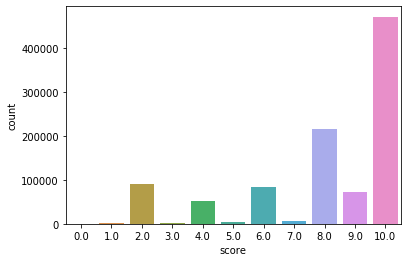

In [94]:
sns.countplot(df_mobile_final['score'])

* Most of the users provided rating on higher end
* Collbarative Filtering Model can be used to provide recommendations to the users

### Try and recommend top 5 products for test users.

In [68]:
df_pred = pd.DataFrame(y_pred_user)

In [69]:
# function that takes in user and number of recommendations as an input and returns the recommended products
def recommendations(user, n):
    
    recommended_products = df_pred [df_pred['uid'] == user][['uid','iid','est']].sort_values('est', ascending=False).head(n)
  
    return recommended_products

In [70]:
# Recommend top 5 products
recommendations('Amazon Customer',5)

,uid,iid,est
257,Amazon Customer,"Mi 4i (Grey, 16GB)",10.000000
790,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.000000
811,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",10.000000
1233,Amazon Customer,"OnePlus X (Onyx, 16GB)",9.322115
116,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",9.162126


In [71]:
recommendations('Cliente Amazon',5)

,uid,iid,est
74,Cliente Amazon,Samsung Galaxy I9060I Grand Neo Plus Smartphon...,8.0048
215,Cliente Amazon,Desconocido Xiaomi Redmi Note 2 - Smartphone l...,8.0048
480,Cliente Amazon,"WIKO Fever 4G Smartphone, 16 GB, Dual SIM, Bianco",8.0048
497,Cliente Amazon,Doogee F5 - Smartphone libre 4G Lte (Pantalla ...,8.0048
564,Cliente Amazon,"Huawei P8 Lite 2017 Smartphone, 16 GB, Nero",8.0048


In [72]:
recommendations('e-bit',5)

,uid,iid,est
56,e-bit,Smartphone Lenovo Vibe K5,8.533333
33,e-bit,Smartphone Samsung Galaxy Gran Prime TV SM-G530,8.174204
479,e-bit,Celular LG Messenger GT360,8.004800
736,e-bit,Asus ZenFone 2 ZE551ML 16GB Z3560,8.004800


### Check for outliers and impute them as required.

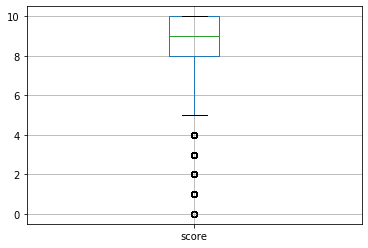

In [76]:
df_mobile_final.boxplot()

In [78]:
Q1 = np.percentile(df_mobile_final['score'], 25, interpolation = 'midpoint') 
Q3 = np.percentile(df_mobile_final['score'], 75, interpolation = 'midpoint') 
Q1, Q3

(8.0, 10.0)

In [80]:
IQR = Q3 - Q1
max_range = Q3 + (IQR * 1.5)
min_range = Q1 - (IQR * 1.5)
min_range, max_range

(5.0, 13.0)

In [81]:
df_mobile_final[df_mobile_final['score'] > 13]

,author,product,score


In [82]:
df_mobile_final[df_mobile_final['score'] < 5]

,author,product,score
245296,AmazonCruiser,"Sony Xperia SP Smartphone (11,7 cm (4,6 Zoll) ...",2.0
30865,CHRISTINA HALLER,"LG G3, Shine Gold 32GB (Sprint)",2.0
21830,lady_thunder,LG Optimus F7 LG870,2.0
88025,NaN,HTC Radar,2.0
9587,Miguel Angel,DOOGEE X5 MAX Smartphone Libre 3G WCDMA (Andro...,2.0
...,...,...,...
173332,Gerhard,"Samsung Galaxy Xcover S5690 Smartphone (9,3 cm...",2.0
20540,Shanmukh,Lenovo Vibe K5 (Grey),2.0
255816,fsvu76,Fly E145,2.0
48902,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)",2.0


In [83]:
df_mobile_new = df_mobile_final.copy()
df_mobile_new.loc[df_mobile_new['score'] < 5.0, 'score'] = 5.0

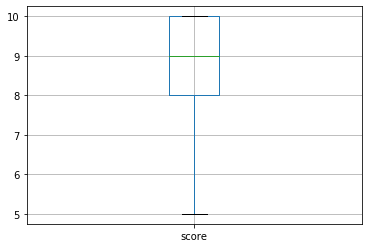

In [86]:
df_mobile_new.boxplot()

In [87]:
df_mobile_new_sample = df_mobile_new.sample(n=5000,random_state=42)

In [88]:
data_new = Dataset.load_from_df(df_mobile_sample[['author','product','score']], reader = reader)

In [89]:
svd_model_new = SVD ()

X_train, y_test = train_test_split(data_new,test_size=0.25,random_state=42)

In [90]:
svd_model_new.fit(X_train)

In [91]:
y_pred_new = svd_model_new.test(y_test)
accuracy.rmse(y_pred_new)

RMSE: 2.5824


2.582436007628497

### Try cross validation techniques to get better results.

In [92]:
cross_validate(svd_model_new, data_new, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.5239  2.6809  2.4829  2.5400  2.5964  2.5648  0.0685  
MAE (testset)     1.9095  2.0663  1.9164  1.9688  1.9914  1.9705  0.0570  
Fit time          0.30    0.27    0.30    0.28    0.27    0.29    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([2.52386966, 2.68090561, 2.48286189, 2.54003041, 2.5963726 ]),
 'test_mae': array([1.90953893, 2.06627825, 1.91637185, 1.96881638, 1.99135559]),
 'fit_time': (0.30324697494506836,
  0.27440881729125977,
  0.30361199378967285,
  0.27521824836730957,
  0.27284979820251465),
 'test_time': (0.007176876068115234,
  0.006646871566772461,
  0.006440877914428711,
  0.0064051151275634766,
  0.007204294204711914)}

### In what business scenario you should use popularity based Recommendation Systems ?

* If we are not having user historical data then we will go for popularity based recommendation systems
* We can use this recommendation on first day of the business based on certain filtering conditions

Example: Trending News or Movies

###  In what business scenario you should use CF based Recommendation Systems ?

* If there is a similarity betweeen different users and items 
* Mostly used in e-commerce website and OTT platforms

### What other possible methods can you think of which can further improve the recommendation for different users ?

* Content Based Recommendation system
* Classification Model based
* Hybrid Approaches
* Association Rule Mining

Thank You !!!